In [187]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [188]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
# Connexion à MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017")
db = client["Spotify"]
collection = db["spotify"]

# Récupération des documents
documents = collection.find({}, {"popularity", "album", "artists.name", "audio_features", "audio_analysis"})

# Conversion des documents en une liste de dictionnaires
documents_list = list(documents)

#artist_names = []
#for doc in documents_list:
#    for artist in doc.get('artists', []): 
#        artist_names.append(artist.get('name'))

# Maintenant, 'artist_names' contient uniquement les noms des artistes.

In [189]:
# Utilisation de json_normalize pour transformer les clés en colonnes
# Cela suppose que 'audio_features' est un dictionnaire
df = pd.json_normalize(documents_list)
#ajouter la colonne artist_names
#df['artist_name'] 
df.to_csv('data.csv')
# Affichage des premières lignes du DataFrame
print(df.columns)

Index(['_id', 'popularity', 'artists', 'album.name', 'album.available_markets',
       'album.release_date', 'album.release_date_precision',
       'album.album_type', 'album.total_tracks', 'audio_features.acousticness',
       'audio_features.danceability', 'audio_features.energy',
       'audio_features.instrumentalness', 'audio_features.loudness',
       'audio_features.liveness', 'audio_features.tempo',
       'audio_features.mode', 'audio_features.speechiness',
       'audio_features.valence', 'audio_features.durations_ms',
       'audio_features.time_signature', 'audio_features.key',
       'audio_analysis.loudness', 'audio_analysis.tempo',
       'audio_analysis.tempo_confidence', 'audio_analysis.time_signature',
       'audio_analysis.time_signature_confidence', 'audio_analysis.key',
       'audio_analysis.key_confidence', 'audio_analysis.mode',
       'audio_analysis.mode_confidence'],
      dtype='object')


In [159]:
df.head(3)

_id  popularity                      artists  \
0  65a6c414ce34c168cd89e60d          90  [{'name': 'Ariana Grande'}]   
1  65a6c414ce34c168cd89e60e          97           [{'name': 'Xavi'}]   
2  65a6c414ce34c168cd89e60f         100     [{'name': 'Tate McRae'}]   

  album.name                            album.available_markets  \
0  yes, and?  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...   
1  La Diabla  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...   
2     greedy  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...   

  album.release_date album.release_date_precision album.album_type  \
0         2024-01-12                          day           single   
1         2023-11-30                          day           single   
2         2023-09-15                          day           single   

   album.total_tracks  audio_features.acousticness  ...  audio_features.key  \
0                   1                        0.198  ...                   1   
1                   1                        0.255  ...                  11   
2                   1                        0.256  ...                   6   

   audio_analysis.loudness  audio_analysis.tempo  \
0                      0.0                   0.0   
1                      0.0                   0.0   
2                      0.0                   0.0   

   audio_analysis.tempo_confidence  audio_analysis.time_signature  \
0                              0.0                              0   
1                              0.0                              0   
2                              0.0                              0   

   audio_analysis.time_signature_confidence  audio_analysis.key  \
0                                       0.0                   0   
1                                       0.0                   0   
2                                       0.0                   0   

   audio_analysis.key_confidence  audio_analysis.mode  \
0                            0.0                    0   
1                            0.0                    0   
2                            0.0                    0   

   audio_analysis.mode_confidence  
0                             0.0  
1                             0.0  
2                             0.0  

[3 rows x 31 columns]

In [160]:
df.tail(3)

_id  popularity                     artists  \
444  65a6c414ce34c168cd89e7c9          66  [{'name': 'Portia Price'}]   
445  65a6c414ce34c168cd89e7ca          71    [{'name': 'Arlo Thiem'}]   
446  65a6c414ce34c168cd89e7cb          66      [{'name': 'Una Luna'}]   

            album.name                            album.available_markets  \
444           My Story  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...   
445         Afterlight  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...   
446  To New Beginnings  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...   

    album.release_date album.release_date_precision album.album_type  \
444         2023-11-24                          day           single   
445         2023-09-29                          day           single   
446         2023-09-29                          day           single   

     album.total_tracks  audio_features.acousticness  ...  audio_features.key  \
444                   1                        0.995  ...                   2   
445                   1                        0.993  ...                   1   
446                   1                        0.993  ...                   4   

     audio_analysis.loudness  audio_analysis.tempo  \
444                      0.0                   0.0   
445                      0.0                   0.0   
446                      0.0                   0.0   

     audio_analysis.tempo_confidence  audio_analysis.time_signature  \
444                              0.0                              0   
445                              0.0                              0   
446                              0.0                              0   

     audio_analysis.time_signature_confidence  audio_analysis.key  \
444                                       0.0                   0   
445                                       0.0                   0   
446                                       0.0                   0   

     audio_analysis.key_confidence  audio_analysis.mode  \
444                            0.0                    0   
445                            0.0                    0   
446                            0.0                    0   

     audio_analysis.mode_confidence  
444                             0.0  
445                             0.0  
446                             0.0  

[3 rows x 31 columns]

In [161]:
df = df.iloc[:, 0:22]
df.columns

Index(['_id', 'popularity', 'artists', 'album.name', 'album.available_markets',
       'album.release_date', 'album.release_date_precision',
       'album.album_type', 'album.total_tracks', 'audio_features.acousticness',
       'audio_features.danceability', 'audio_features.energy',
       'audio_features.instrumentalness', 'audio_features.loudness',
       'audio_features.liveness', 'audio_features.tempo',
       'audio_features.mode', 'audio_features.speechiness',
       'audio_features.valence', 'audio_features.durations_ms',
       'audio_features.time_signature', 'audio_features.key'],
      dtype='object')

In [162]:
# Nous allons supprimer certaines colonnes ici 
df.drop(columns = [ 'album.name', 'album.available_markets', 'album.release_date_precision'], inplace =True)

In [163]:
df.head(3)

_id  popularity                      artists  \
0  65a6c414ce34c168cd89e60d          90  [{'name': 'Ariana Grande'}]   
1  65a6c414ce34c168cd89e60e          97           [{'name': 'Xavi'}]   
2  65a6c414ce34c168cd89e60f         100     [{'name': 'Tate McRae'}]   

  album.release_date album.album_type  album.total_tracks  \
0         2024-01-12           single                   1   
1         2023-11-30           single                   1   
2         2023-09-15           single                   1   

   audio_features.acousticness  audio_features.danceability  \
0                        0.198                        0.788   
1                        0.255                        0.751   
2                        0.256                        0.750   

   audio_features.energy  audio_features.instrumentalness  \
0                  0.758                         0.000085   
1                  0.819                         0.000000   
2                  0.733                         0.000000   

   audio_features.loudness  audio_features.liveness  audio_features.tempo  \
0                   -6.513                    0.104               119.008   
1                   -4.372                    0.236               131.842   
2                   -3.180                    0.114               111.018   

   audio_features.mode  audio_features.speechiness  audio_features.valence  \
0                    1                      0.0505                   0.823   
1                    0                      0.0409                   0.697   
2                    0                      0.0319                   0.844   

   audio_features.durations_ms  audio_features.time_signature  \
0                            0                              4   
1                            0                              3   
2                            0                              1   

   audio_features.key  
0                   1  
1                  11  
2                   6

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _id                              447 non-null    object 
 1   popularity                       447 non-null    int64  
 2   artists                          447 non-null    object 
 3   album.release_date               447 non-null    object 
 4   album.album_type                 447 non-null    object 
 5   album.total_tracks               447 non-null    int64  
 6   audio_features.acousticness      447 non-null    float64
 7   audio_features.danceability      447 non-null    float64
 8   audio_features.energy            447 non-null    float64
 9   audio_features.instrumentalness  447 non-null    float64
 10  audio_features.loudness          447 non-null    float64
 11  audio_features.liveness          447 non-null    float64
 12  audio_features.tempo  

On constate pas de valeurs manquantes 

In [165]:
df.drop(columns = ['audio_features.durations_ms'], inplace = True) 
df_number = df.copy()
df.head(2)
df_number.drop(columns = ['_id', 'artists', 'album.release_date', 'album.album_type'],inplace = True)

In [166]:
describe = df_number.describe()
#La disparité mesure l’équilibrage dans la répartition des données d’un dataset. Et les mesures comme le skewness nous permettront 
#mesurer cette disparite
describe.loc['skew'] = df_number.skew()
#Le Kurtosis calcule la hauteur des queues du graphe. Vistez le site ici pour plus d'explication 
# https://inside-machinelearning.com/skewness-et-kurtosis/
describe.loc['kurtosis'] = df_number.kurt()
describe.loc['median'] = df_number.median()
describe.loc['iqr'] = describe.loc['75%']-describe.loc['25%']
describe


popularity  album.total_tracks  audio_features.acousticness  \
count     447.000000          447.000000                   447.000000   
mean       73.507830            6.324385                     0.330799   
std        15.077656            7.320952                     0.332816   
min         0.000000            1.000000                     0.000050   
25%        64.000000            1.000000                     0.056400   
50%        72.000000            1.000000                     0.198000   
75%        86.000000           12.000000                     0.532500   
max       100.000000           40.000000                     0.996000   
skew       -0.342173            1.158783                     0.908000   
kurtosis    0.337303            0.473100                    -0.568979   
median     72.000000            1.000000                     0.198000   
iqr        22.000000           11.000000                     0.476100   

          audio_features.danceability  audio_features.energy  \
count                      447.000000             447.000000   
mean                         0.649707               0.557145   
std                          0.161222               0.245596   
min                          0.178000               0.001520   
25%                          0.525000               0.453000   
50%                          0.671000               0.604000   
75%                          0.777500               0.733000   
max                          0.960000               0.958000   
skew                        -0.338299              -0.907287   
kurtosis                    -0.550057               0.082010   
median                       0.671000               0.604000   
iqr                          0.252500               0.280000   

          audio_features.instrumentalness  audio_features.loudness  \
count                          447.000000               447.000000   
mean                             0.123688                -9.550653   
std                              0.299025                 7.639698   
min                              0.000000               -36.937000   
25%                              0.000000                -9.259000   
50%                              0.000013                -7.179000   
75%                              0.003195                -5.422000   
max                              0.986000                -1.231000   
skew                             2.230608                -2.168277   
kurtosis                         3.175410                 3.719830   
median                           0.000013                -7.179000   
iqr                              0.003195                 3.837000   

          audio_features.liveness  audio_features.tempo  audio_features.mode  \
count                  447.000000            447.000000           447.000000   
mean                     0.170427            119.188298             0.590604   
std                      0.119056             28.218100             0.492273   
min                      0.023200             51.579000             0.000000   
25%                      0.102000             99.991000             0.000000   
50%                      0.118000            117.310000             1.000000   
75%                      0.194000            138.035000             1.000000   
max                      0.791000            217.969000             1.000000   
skew                     1.991130              0.320372            -0.369759   
kurtosis                 4.106644             -0.127710            -1.871673   
median                   0.118000            117.310000             1.000000   
iqr                      0.092000             38.044000             1.000000   

          audio_features.speechiness  audio_features.valence  \
count                     447.000000              447.000000   
mean                        0.110640                0.468252   
std                         0.111320                0.233741   
min                

Le Kurtosis calcule la hauteur des queues du graphe. Vistez le site ici pour plus d'explication 
 https://inside-machinelearning.com/skewness-et-kurtosis/ et pour iqr(intervalle inter quartile) : https://www.greelane.com/fr/science-technologie-math%C3%A9matiques/math/what-is-the-interquartile-range-3126245/

- On constate deja que certaines colonnes comme **audio_features.durations_ms** n'ont pas de valeurs ou toutes les valeurs sont a 0\
Nous allons supprimer cette colonne.
- On voit aussi que la colonne popularite qui doit etre predite n'est pas assez representative, c'est a dire que la moyenne se trouve **73.50** trop\
eleve. Nous allons alors donc pour les donnees puissent etre representatives chercher a l'enrichir avec des playlist pas trop populaire en bas de 50.

In [167]:
# Nombre d'artiste dans la playlist
number_of_unique_artists = len(df['artists'].value_counts().to_list())
print("Number Of Unique Artists: ",number_of_unique_artists)

Number Of Unique Artists:  351


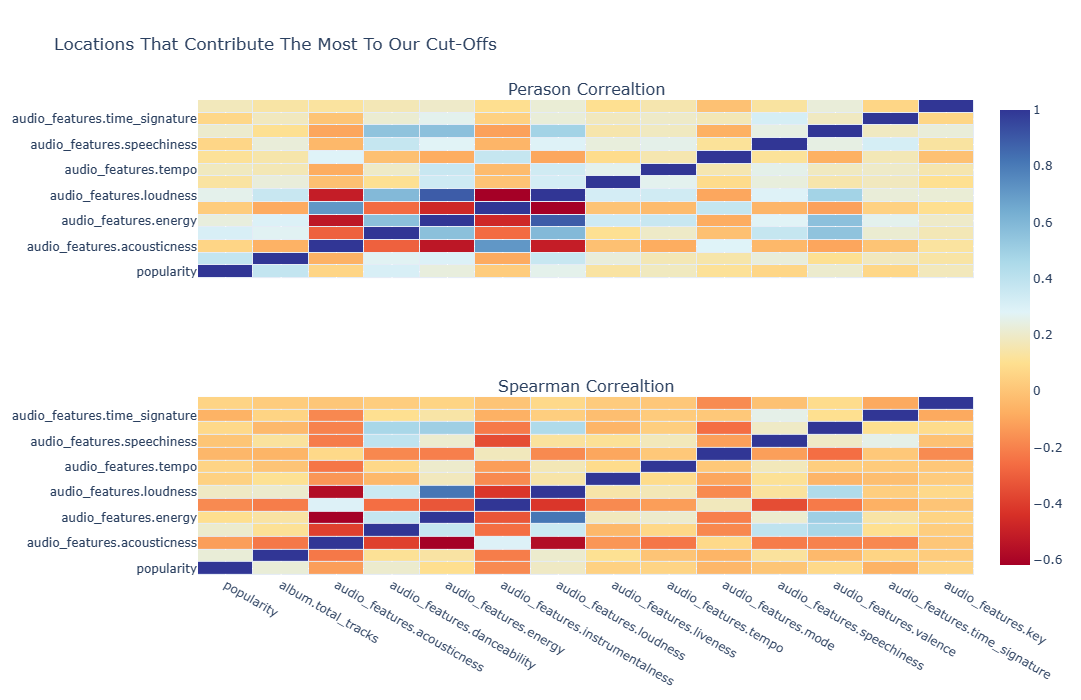

In [168]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))
colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]]

s_val =df_number.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


s_val =df_number.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Locations That Contribute The Most To Our Cut-Offs")
fig.show()

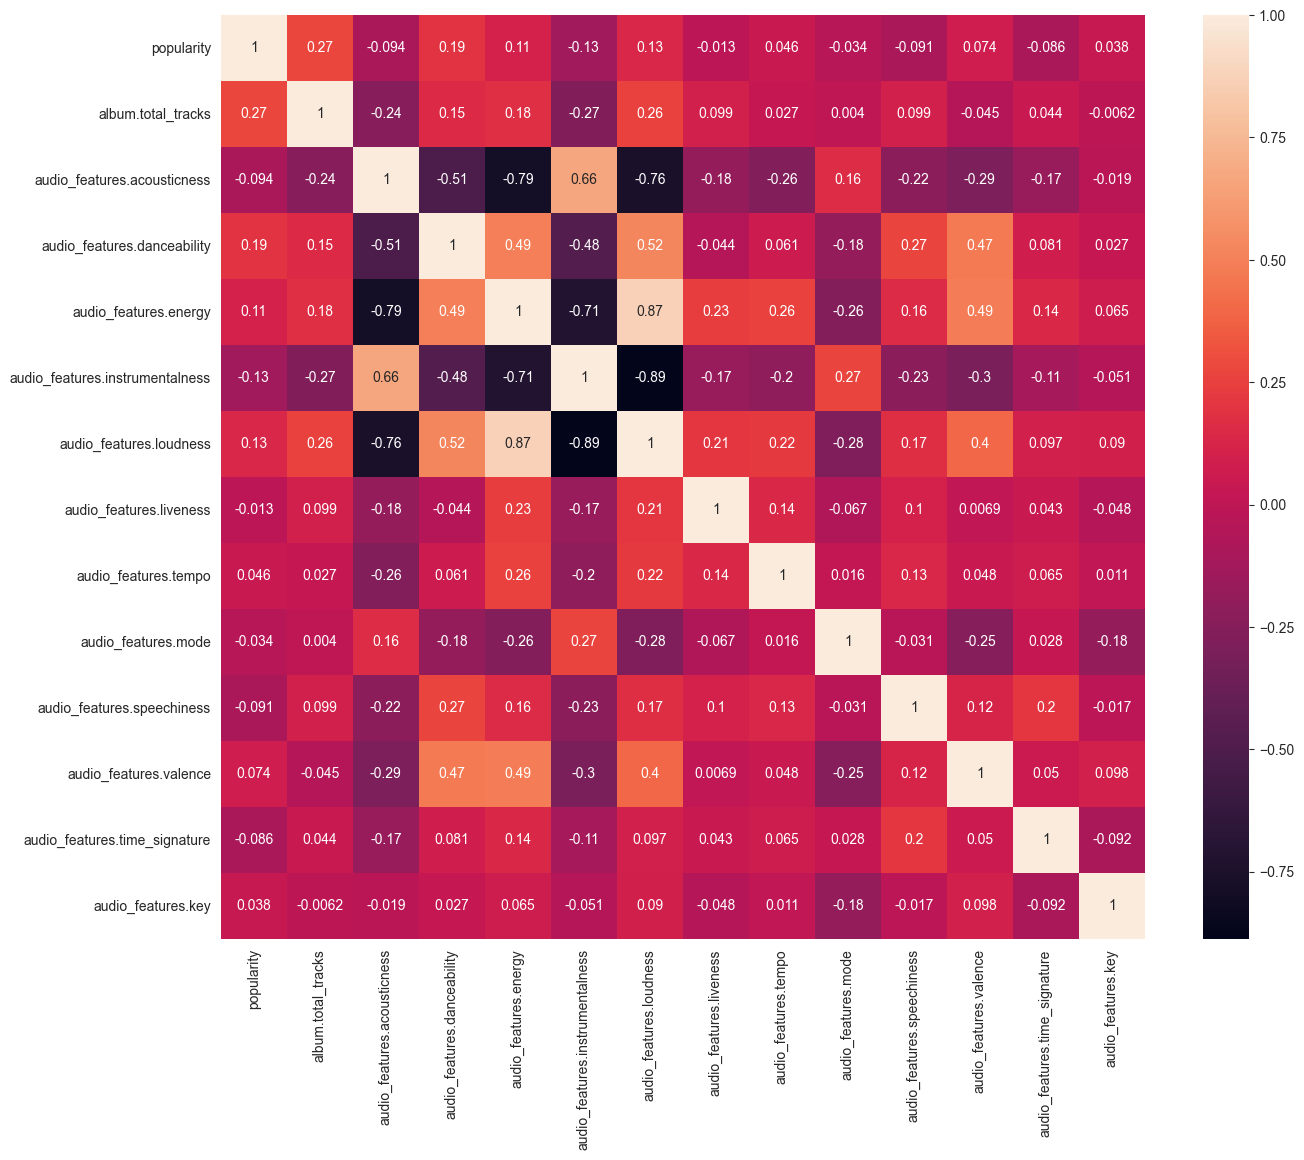

In [169]:
# visaulize the correlation matrix
cor_mat= df_number[:].corr()
fig=plt.gcf()
fig.set_size_inches(15,12)
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True)
plt.savefig('corr-matrix.png')
plt.show()

C:\Users\thibaut7\AppData\Local\Temp\ipykernel_19800\2009335840.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


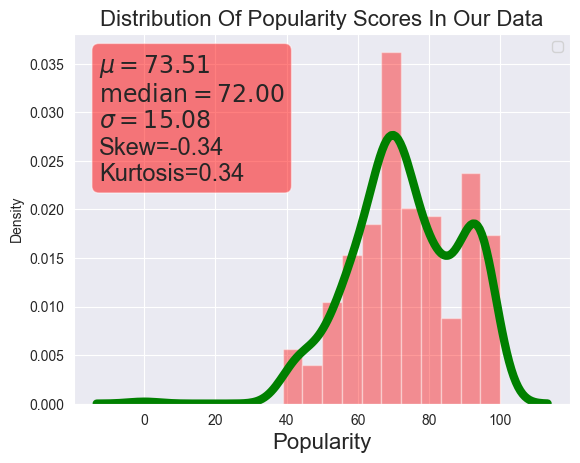

In [170]:
ax = sns.distplot(df_number['popularity'],hist_kws={'color':'r'},kde_kws={'color':'g','lw':'6'})
textstr = '\n'.join(
    
        (   r'$\mu=%.2f$' % (df_number['popularity'].mean(),)
          , r'$\mathrm{median}=%.2f$' % (df_number['popularity'].median(),)
          , r'$\sigma=%.2f$' % (df_number['popularity'].std(),)
          , r'Skew=%.2f' % (df_number['popularity'].skew(),)
          , r'Kurtosis=%.2f' % (df_number['popularity'].kurt(),)

        )
    
                  )

props = dict(boxstyle='round', facecolor='red', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=17,
        verticalalignment='top', bbox=props)
ax.set_title('Distribution Of Popularity Scores In Our Data',fontsize=16)
ax.set_xlabel('Popularity',fontsize=16)
plt.legend()
plt.show()

## Etude des 10 tops songs 

In [171]:
top_10_songs = df_number.sort_values(by ='popularity', ascending = False)
top_10_songs =  top_10_songs.iloc[0:9, :]
top_10_songs

popularity  album.total_tracks  audio_features.acousticness  \
2           100                   1                       0.2560   
201         100                   1                       0.2560   
3            99                   1                       0.0026   
154          99                   1                       0.0026   
6            99                  18                       0.1170   
200          99                   1                       0.0026   
203          99                  18                       0.1170   
4            98                  11                       0.8680   
214          98                  11                       0.8680   

     audio_features.danceability  audio_features.energy  \
2                          0.750                  0.733   
201                        0.750                  0.733   
3                          0.943                  0.558   
154                        0.943                  0.558   
6                          0.552                  0.702   
200                        0.943                  0.558   
203                        0.552                  0.702   
4                          0.504                  0.308   
214                        0.504                  0.308   

     audio_features.instrumentalness  audio_features.loudness  \
2                           0.000000                   -3.180   
201                         0.000000                   -3.180   
3                           0.000002                   -4.911   
154                         0.000002                   -4.911   
6                           0.000021                   -5.707   
200                         0.000002                   -4.911   
203                         0.000021                   -5.707   
4                           0.135000                  -14.958   
214                         0.135000                  -14.958   

     audio_features.liveness  audio_features.tempo  audio_features.mode  \
2                     0.1140               111.018                    0   
201                   0.1140               111.018                    0   
3                     0.0937               104.983                    1   
154                   0.0937               104.983                    1   
6                     0.1050               169.994                    1   
200                   0.0937               104.983                    1   
203                   0.1050               169.994                    1   
4                     0.1580               113.950                    1   
214                   0.1580               113.950                    1   

     audio_features.speechiness  audio_features.valence  \
2                        0.0319                   0.844   
201                      0.0319                   0.844   
3                        0.0568                   0.606   
154                      0.0568                   0.606   
6                        0.1570                   0.564   
200                      0.0568                   0.606   
203                      0.1570                   0.564   
4                        0.0321                   0.121   
214                      0.0321                   0.121   

     audio_features.time_signature  audio_features.key  
2                                1                   6  
201                              1                   6  
3                                4                   2  
154                              4                   2  
6                                4                   9  
200                              4                   2  
203                              4                   9  
4                                4                   9  
214                              4                   9

C:\Users\thibaut7\AppData\Local\Temp\ipykernel_19800\1567720925.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thibaut7\AppData\Local\Temp\ipykernel_19800\1567720925.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thibaut7\AppData\Local\Temp\ipykernel_19800\1567720925.py:5: Us

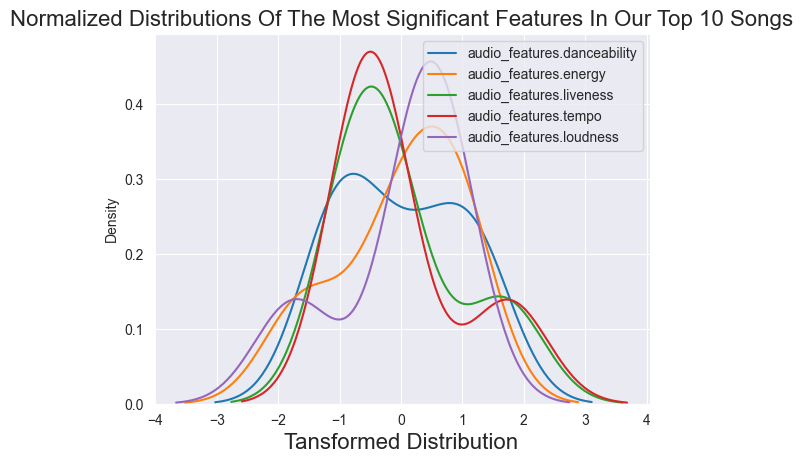

In [172]:
numeric_f = top_10_songs
cor = top_10_songs.corr()
ax = sns.distplot((top_10_songs['audio_features.danceability']-top_10_songs['audio_features.danceability'].mean())/top_10_songs['audio_features.danceability'].std(),hist=False,label='audio_features.danceability')
ax = sns.distplot((top_10_songs['audio_features.energy']-top_10_songs['audio_features.energy'].mean())/top_10_songs['audio_features.energy'].std(),hist=False,label='audio_features.energy')
ax = sns.distplot((top_10_songs['audio_features.liveness']-top_10_songs['audio_features.liveness'].mean())/top_10_songs['audio_features.liveness'].std(),hist=False,label='audio_features.liveness')
ax = sns.distplot((top_10_songs['audio_features.tempo']-top_10_songs['audio_features.tempo'].mean())/top_10_songs['audio_features.tempo'].std(),hist=False,label='audio_features.tempo')
ax = sns.distplot((top_10_songs['audio_features.loudness']-top_10_songs['audio_features.loudness'].mean())/top_10_songs['audio_features.loudness'].std(),hist=False,label='audio_features.loudness')
ax.set_xlabel('Tansformed Distribution',fontsize=16)
ax.set_title('Normalized Distributions Of The Most Significant Features In Our Top 10 Songs',fontsize=16)
plt.legend(prop={'size':'10'})
plt.show()

In [173]:
df_number.columns

Index(['popularity', 'album.total_tracks', 'audio_features.acousticness',
       'audio_features.danceability', 'audio_features.energy',
       'audio_features.instrumentalness', 'audio_features.loudness',
       'audio_features.liveness', 'audio_features.tempo',
       'audio_features.mode', 'audio_features.speechiness',
       'audio_features.valence', 'audio_features.time_signature',
       'audio_features.key'],
      dtype='object')

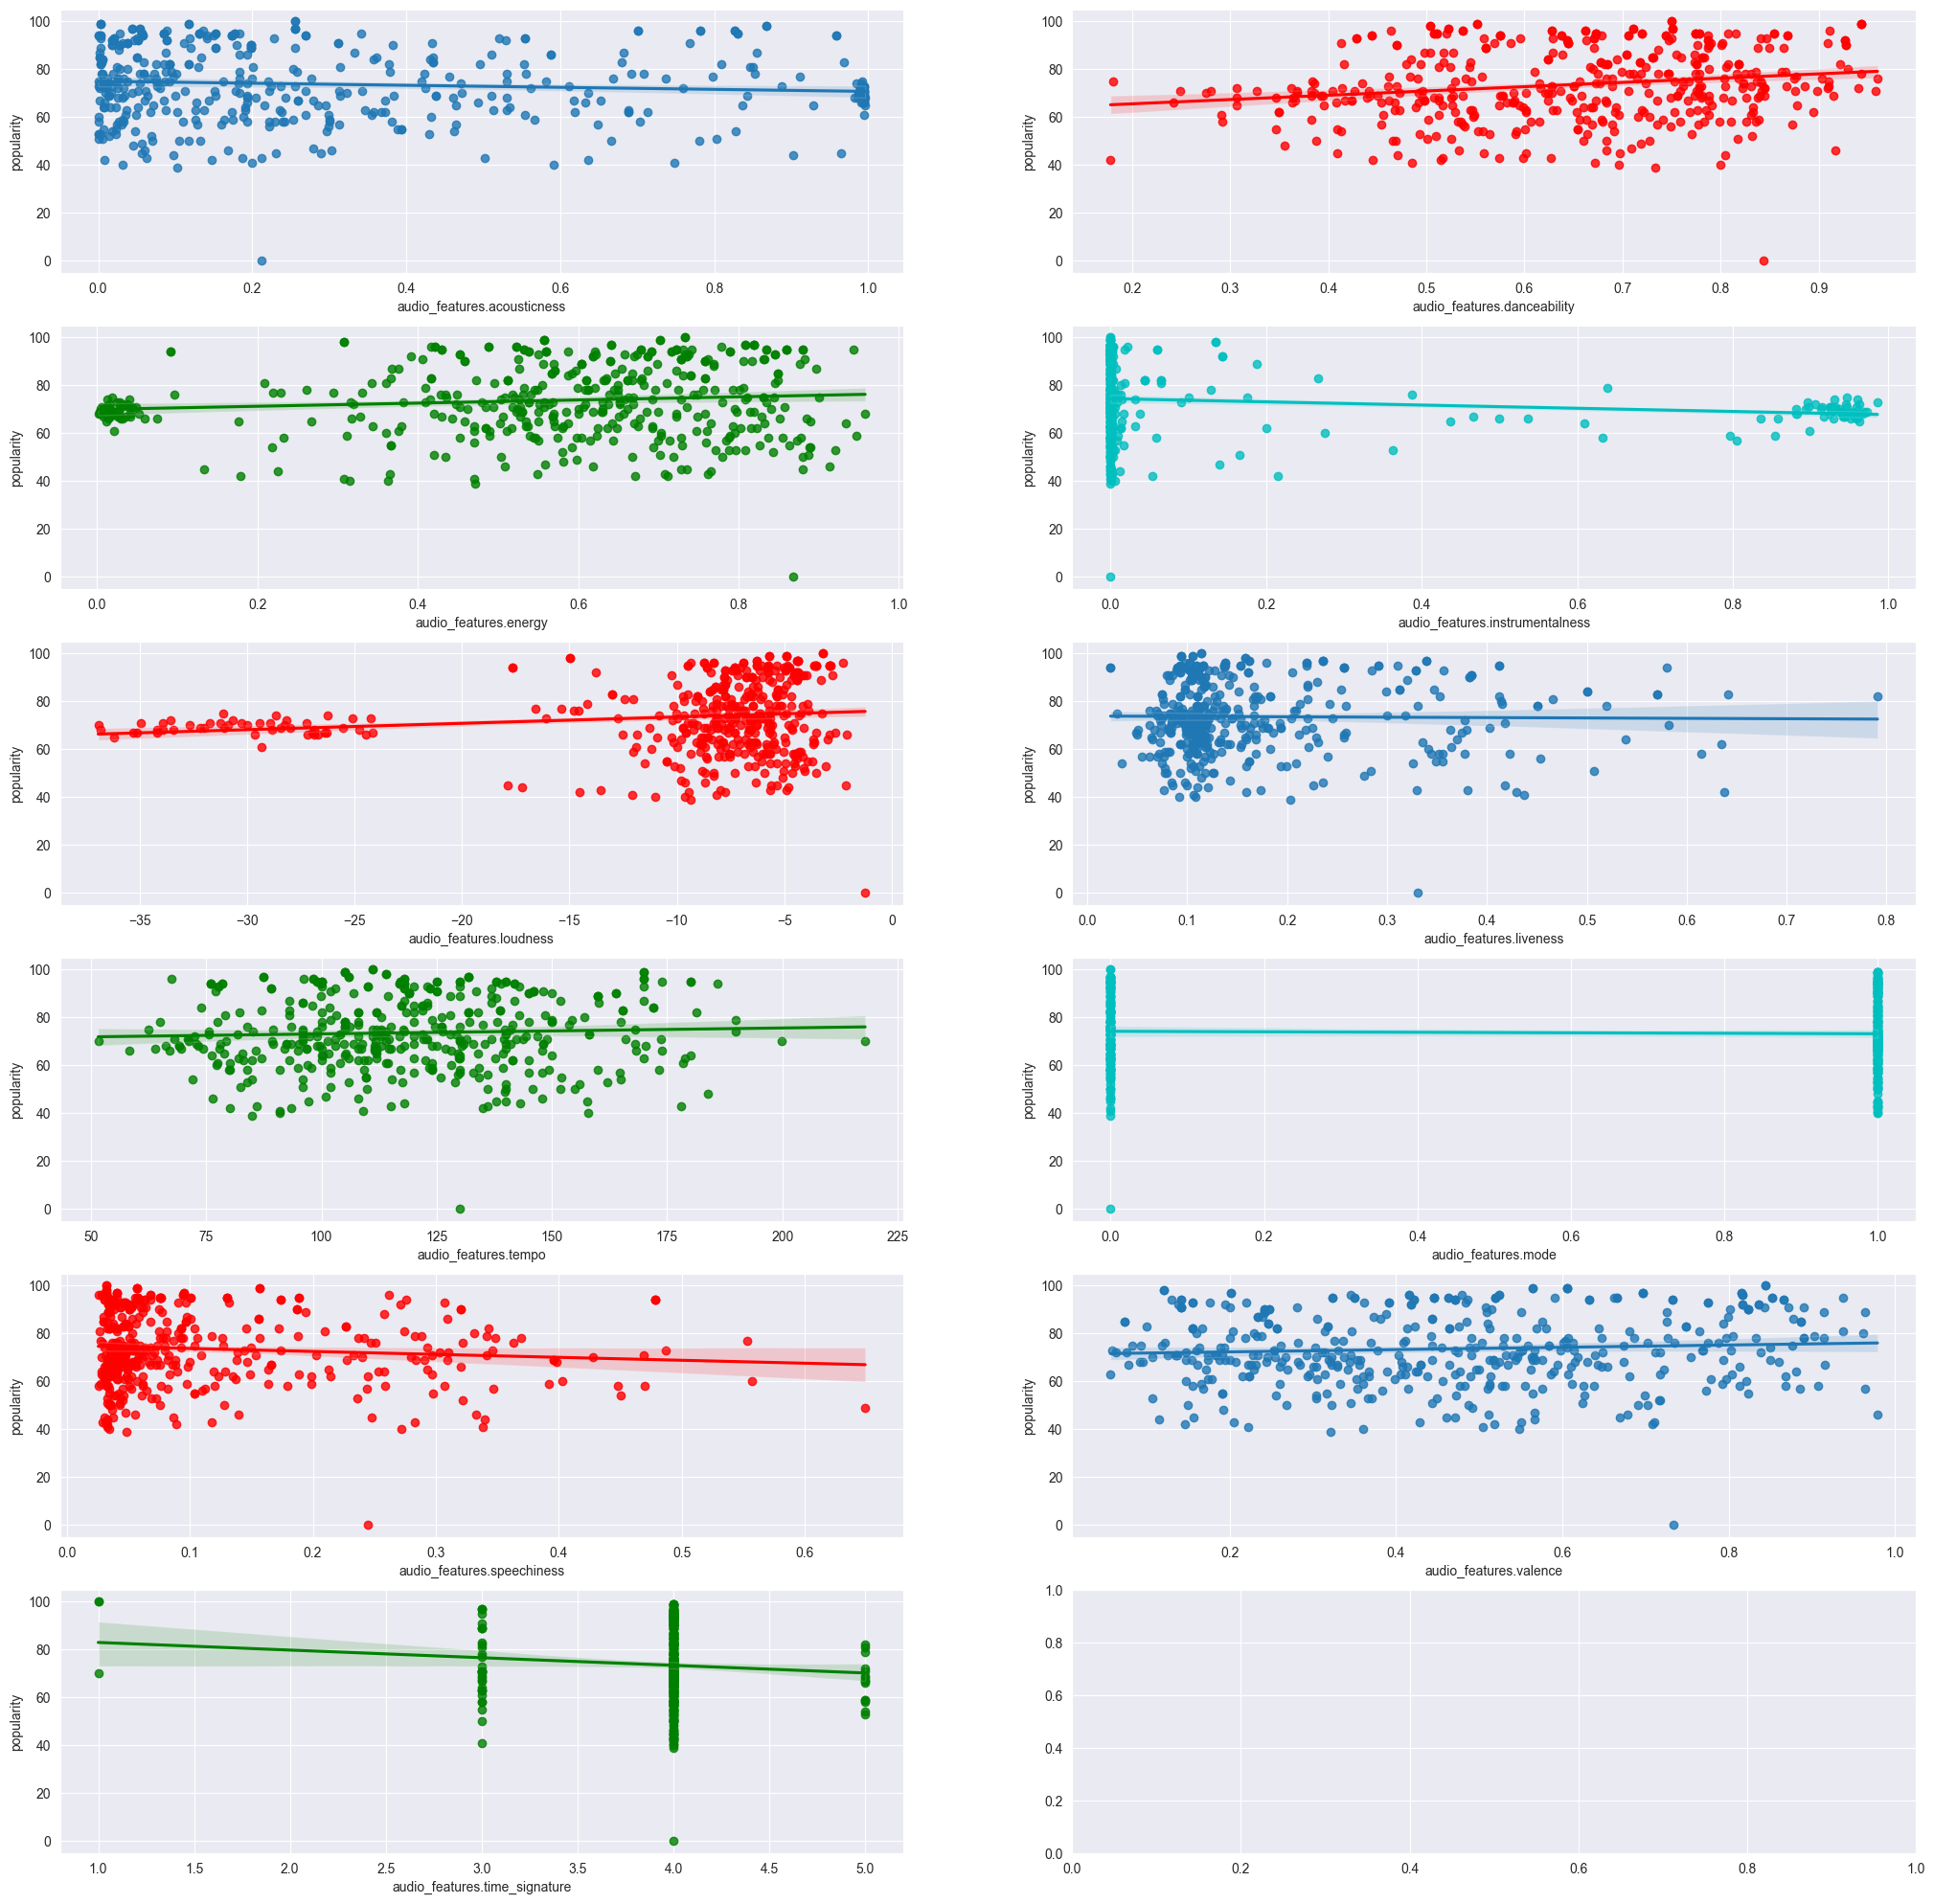

In [174]:
p_correaltion=['audio_features.acousticness',
       'audio_features.danceability', 'audio_features.energy',
       'audio_features.instrumentalness', 'audio_features.loudness',
       'audio_features.liveness', 'audio_features.tempo',
       'audio_features.mode', 'audio_features.speechiness',
       'audio_features.valence',
       'audio_features.time_signature', 'audio_features.key']
fig,axs = plt.subplots(6,2)
fig.set_figheight(25)
fig.set_figwidth(25)
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[1]],ax=axs[0,1],color='r')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[0]],ax=axs[0,0])
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[2]],ax=axs[1,0],color='g')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[3]],ax=axs[1,1],color='c')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[4]],ax=axs[2,0],color='r')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[5]],ax=axs[2,1])
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[6]],ax=axs[3,0],color='g')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[7]],ax=axs[3,1],color='c')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[8]],ax=axs[4,0],color='r')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[9]],ax=axs[4,1])
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[10]],ax=axs[5,0],color='g')
plt.show()

## MODEL SELECTION AND EVALUATION

In [175]:
y = df_number['popularity']
X = df_number[['audio_features.acousticness',
       'audio_features.danceability', 'audio_features.energy',
       'audio_features.instrumentalness', 'audio_features.loudness',
       'audio_features.liveness', 'audio_features.tempo',
       'audio_features.mode', 'audio_features.speechiness',
       'audio_features.valence',
       'audio_features.time_signature', 'audio_features.key']]

Nous faisons ci-dessus un pipeline de model 

In [176]:
#Knn Pipe
Knn_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',KNeighborsRegressor(n_neighbors=5))])
Knn_scores = np.sqrt(-1*cross_val_score(Knn_Pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
Knn_Pipe.fit(X,y)

#Random Forest Pipe
RF_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',RandomForestRegressor(max_leaf_nodes=14,n_estimators=20,random_state=42))])
RF_scores = np.sqrt(-1*cross_val_score(RF_Pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
RF_Pipe.fit(X,y)

#Decision Tree Pipe
DT_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',DecisionTreeRegressor(max_leaf_nodes=10))])
DT_scores = np.sqrt(-1*cross_val_score(DT_Pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
DT_Pipe.fit(X,y)

#Linear Regression Pipe
LR_pipe = Pipeline(steps=[('scaler',StandardScaler()),('poly',PolynomialFeatures(degree=1)),('LinearRegression',LinearRegression())])
LR_scores = np.sqrt(-1*cross_val_score(LR_pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
LR_pipe.fit(X,y)

pred = LR_pipe.predict(X)
mse = np.sqrt(mean_squared_error(pred,y))

In [177]:
print(mse)

14.499609374293872


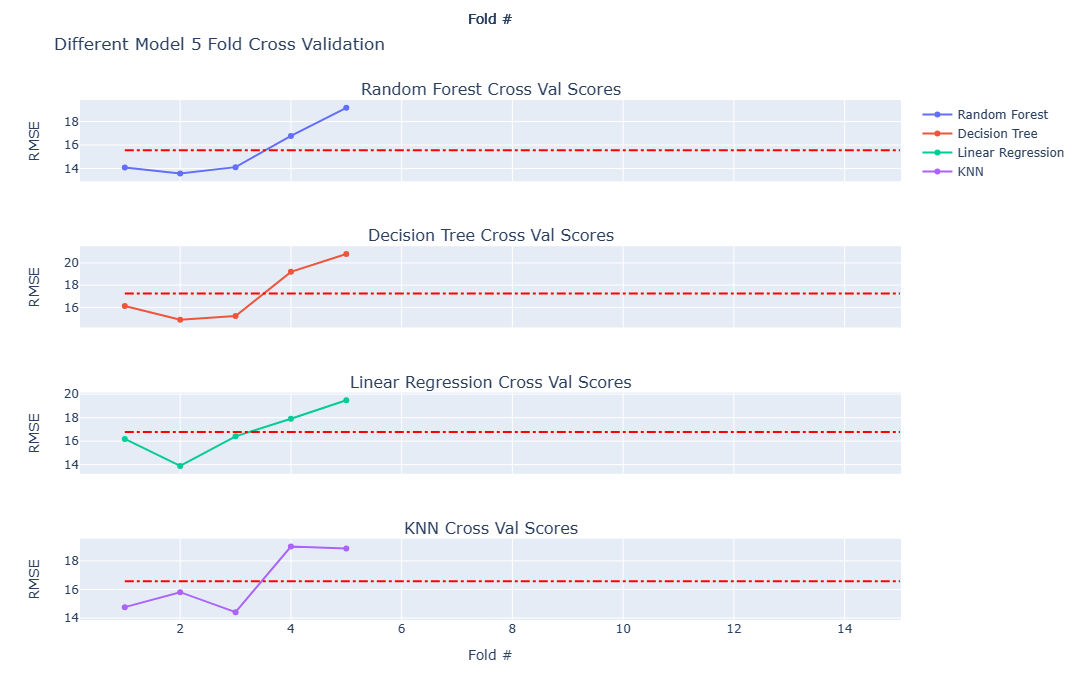

In [178]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,subplot_titles=('Random Forest Cross Val Scores',
                                                                     'Decision Tree Cross Val Scores',
                                                                    'Linear Regression Cross Val Scores',
                                                                    'KNN Cross Val Scores'))

fig.add_trace(
    go.Scatter(x = np.arange(1,len(RF_scores)+1),y=RF_scores,mode='lines+markers',name='Random Forest'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x = np.arange(1,len(DT_scores)+1),y=DT_scores,mode='lines+markers',name='Decision Tree'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x = np.arange(1,len(LR_scores)+1),y=LR_scores,mode='lines+markers',name='Linear Regression'),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x = np.arange(1,len(Knn_scores)+1),y=Knn_scores,mode='lines+markers',name='KNN'),
    row=4, col=1
)


#Fold Means
fig.add_shape(type="line",
    x0=1, y0=np.mean(RF_scores), x1=15, y1=np.mean(RF_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x1', 
        yref='y1'
)

fig.add_shape(type="line",
    x0=1, y0=np.mean(DT_scores), x1=15, y1=np.mean(DT_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

fig.add_shape(type="line",
    x0=1, y0=np.mean(LR_scores), x1=15, y1=np.mean(LR_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x3', 
        yref='y3'
)

fig.add_shape(type="line",
    x0=1, y0=np.mean(Knn_scores), x1=15, y1=np.mean(Knn_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x4', 
        yref='y4'
)


fig.update_layout(height=700, width=900, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="RMSE")
fig.update_xaxes(title_text="Fold #")

fig.show()

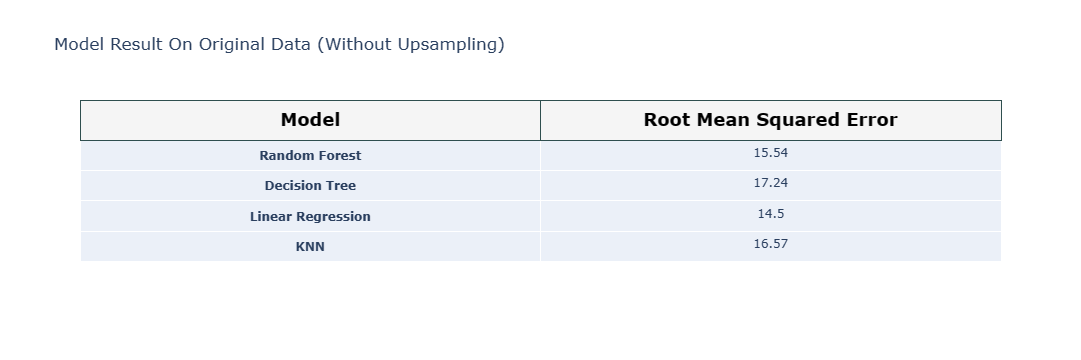

In [179]:
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Root Mean Squared Error<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=40),
                               
                 cells=dict(values=[['<b>Random Forest<b>', '<b>Decision Tree<b>','<b>Linear Regression<b>','<b>KNN<b>'],
                                    [np.round(RF_scores.mean(),2), 
                                     np.round(DT_scores.mean(),2),
                                     np.round(mse,2),
                                     np.round(Knn_scores.mean(),2) 
                                    ]]))
                     ])

fig.update_layout(title='Model Result On Original Data (Without Upsampling)')
fig.show()

Nous voyons que le model de la **regression lineaire** est le model le plus performant; Nous selectionnons donc ce model.
Par la suite nous allons essayer d'ameliorer ce score.

## Etude de la significativite des variables 

In [180]:
import statsmodels.api as sm

# Ajouter une colonne constante à X pour l'intercept
X_sm = sm.add_constant(X)

# Ajuster le même modèle avec statsmodels
modele_sm = sm.OLS(y, X_sm).fit()

# Afficher le résumé pour obtenir p-valeur, R², etc.
print(modele_sm.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     2.854
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           0.000858
Time:                        18:18:24   Log-Likelihood:                -1829.6
No. Observations:                 447   AIC:                             3685.
Df Residuals:                     434   BIC:                             3739.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Pour l'etude de la significativite des variables, nous nous referons au p-value. Les variables avec un p-value > 0.05 ne sont pas significative\
ici donc **les audio_features.acousticness, audio_features.energy, audio_features.instrumentalness, audio_features.loudness, audio_features.liveness, audio_features.tempo, audio_features.mode audio_features.valence, audio_features.time_signature, audio_features.key**\
Lien pour comprendre les sorties de statsmodels: https://github.com/atulpatelDS/Youtube/blob/main/Machine_Learning/Linear_Regression/Interpretaion_Model_Summary_statsmodels_Linear_Regression.ipynb

Nous allons donc retenir a la fin que 2 variables **'audio_features.danceability', 'audio_features.speechiness'**

In [181]:
X = X[['audio_features.danceability', 'audio_features.speechiness']]

In [182]:
X.head(2)

audio_features.danceability  audio_features.speechiness
0                        0.788                      0.0505
1                        0.751                      0.0409

In [183]:
X_sm = sm.add_constant(X)

# Ajuster le même modèle avec statsmodels
modele_sm = sm.OLS(y, X_sm).fit()

# Afficher le résumé pour obtenir p-valeur, R², etc.
print(modele_sm.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     13.74
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.63e-06
Time:                        18:18:24   Log-Likelihood:                -1833.2
No. Observations:                 447   AIC:                             3672.
Df Residuals:                     444   BIC:                             3685.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [184]:
#Knn Pipe
Knn_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',KNeighborsRegressor(n_neighbors=5))])
Knn_scores = np.sqrt(-1*cross_val_score(Knn_Pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
Knn_Pipe.fit(X,y)

#Random Forest Pipe
RF_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',RandomForestRegressor(max_leaf_nodes=14,n_estimators=20,random_state=42))])
RF_scores = np.sqrt(-1*cross_val_score(RF_Pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
RF_Pipe.fit(X,y)

#Decision Tree Pipe
DT_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',DecisionTreeRegressor(max_leaf_nodes=10))])
DT_scores = np.sqrt(-1*cross_val_score(DT_Pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
DT_Pipe.fit(X,y)

#Linear Regression Pipe
LR_pipe = Pipeline(steps=[('scaler',StandardScaler()),('poly',PolynomialFeatures(degree=1)),('LinearRegression',LinearRegression())])
LR_scores = np.sqrt(-1*cross_val_score(LR_pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
LR_pipe.fit(X,y)

pred = LR_pipe.predict(X)
mse = np.sqrt(mean_squared_error(pred,y))

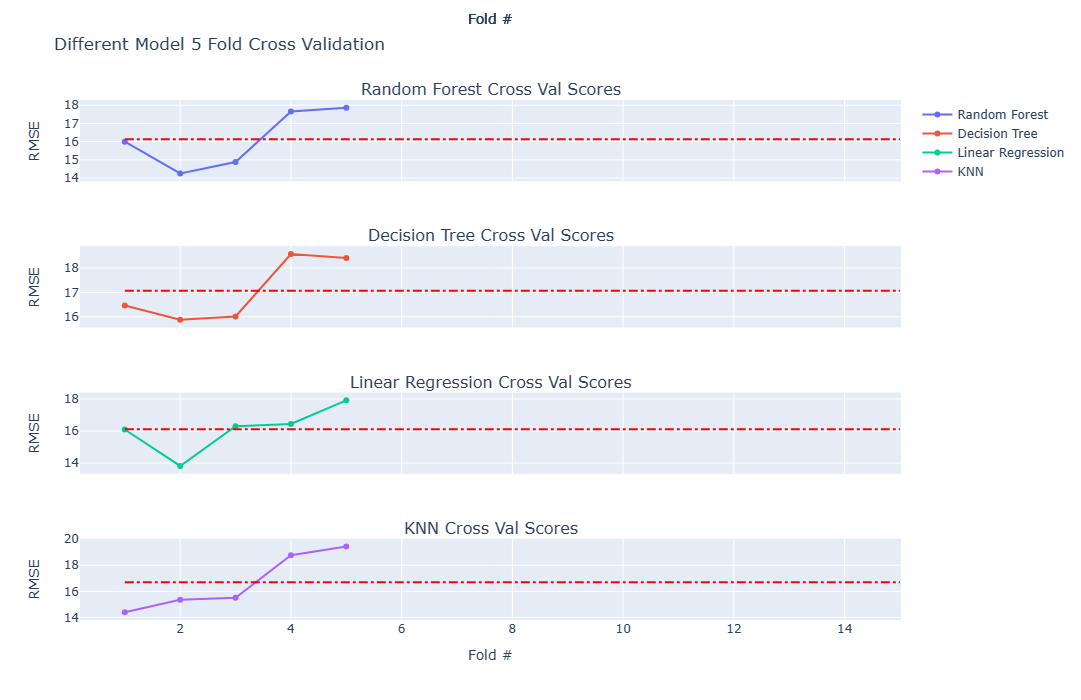

In [185]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,subplot_titles=('Random Forest Cross Val Scores',
                                                                     'Decision Tree Cross Val Scores',
                                                                    'Linear Regression Cross Val Scores',
                                                                    'KNN Cross Val Scores'))

fig.add_trace(
    go.Scatter(x = np.arange(1,len(RF_scores)+1),y=RF_scores,mode='lines+markers',name='Random Forest'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x = np.arange(1,len(DT_scores)+1),y=DT_scores,mode='lines+markers',name='Decision Tree'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x = np.arange(1,len(LR_scores)+1),y=LR_scores,mode='lines+markers',name='Linear Regression'),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x = np.arange(1,len(Knn_scores)+1),y=Knn_scores,mode='lines+markers',name='KNN'),
    row=4, col=1
)


#Fold Means
fig.add_shape(type="line",
    x0=1, y0=np.mean(RF_scores), x1=15, y1=np.mean(RF_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x1', 
        yref='y1'
)

fig.add_shape(type="line",
    x0=1, y0=np.mean(DT_scores), x1=15, y1=np.mean(DT_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

fig.add_shape(type="line",
    x0=1, y0=np.mean(LR_scores), x1=15, y1=np.mean(LR_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x3', 
        yref='y3'
)

fig.add_shape(type="line",
    x0=1, y0=np.mean(Knn_scores), x1=15, y1=np.mean(Knn_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x4', 
        yref='y4'
)


fig.update_layout(height=700, width=900, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="RMSE")
fig.update_xaxes(title_text="Fold #")

fig.show()

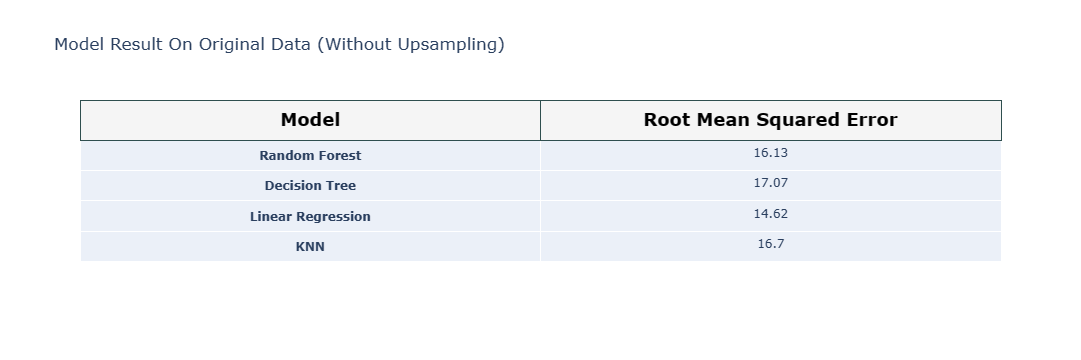

In [186]:
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Root Mean Squared Error<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=40),
                               
                 cells=dict(values=[['<b>Random Forest<b>', '<b>Decision Tree<b>','<b>Linear Regression<b>','<b>KNN<b>'],
                                    [np.round(RF_scores.mean(),2), 
                                     np.round(DT_scores.mean(),2),
                                     np.round(mse,2),
                                     np.round(Knn_scores.mean(),2) 
                                    ]]))
                     ])

fig.update_layout(title='Model Result On Original Data (Without Upsampling)')
fig.show()